In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

In [9]:
# Importing data
email = pd.read_csv("/content/emails.csv")
email.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [10]:
# dropping duplicate date
email.drop_duplicates(inplace=True)
email.shape

(5695, 2)

In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# splitting the text, stemming the words and preproessing

email['text']=email['text'].map(lambda text: text[0:])
email['text'] = email['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())
ps = PorterStemmer()
corpus=email['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
vect = CountVectorizer()

In [0]:
# Converting data to array form
X = vect.fit_transform(corpus.values).toarray()
Y = email.iloc[:,1].values

In [18]:
# Splitting the dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print(x_train.shape)
print(y_train.shape)

(3986, 29222)
(3986,)


In [0]:
# Creating classifier object
classifier = MultinomialNB()

In [20]:
# Training the classifier
classifier.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Prediction through the classifer
y_pred = classifier.predict(x_test)

In [22]:
# Measuring the accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc_exact = accuracy_score(y_test, y_pred, normalize=False)
print(acc)
print(acc_exact, "out of", x_test.shape[0])

0.9894675248683441
1691 out of 1709


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
# Creating confusion matrix
con = confusion_matrix(y_test, y_pred)

In [25]:
print(con)

[[1256   13]
 [   5  435]]


In [34]:
# converting the confusion matrix to percentages
cm = con*100/y_pred.shape[0]
cm

array([[73.49327092,  0.76067876],
       [ 0.29256875, 25.45348157]])

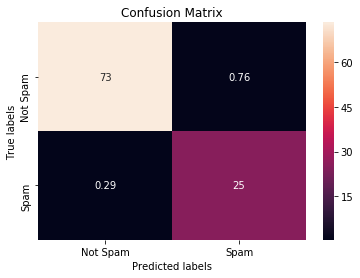

In [44]:
import seaborn as sns

# plotting heatmap
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax );

# labels and titles
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);